<a href="https://colab.research.google.com/github/pawnzo90z/competitions/blob/master/ML_hackerearth_nlp_mothers_day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/mothers_day_hackerearth')

In [ ]:
test = pd.read_csv('dataset/test.csv')
train = pd.read_csv('dataset/train.csv')

**Pre-Processing**

In [ ]:
train.sentiment_class.value_counts()

 0    1701
-1     769
 1     765
Name: sentiment_class, dtype: int64

In [ ]:
#dict to change negations
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have",'&':'and'}


In [ ]:
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';(', ':/'
    ])
emoticons = emoticons_happy.union(emoticons_sad)
#list of emojis
emoticons = list(emoticons)

In [ ]:
train_len = len(train.sentiment_class)

In [ ]:
## apply dict of negation and emojis
for i in range(train_len):
  train['original_text'].loc[i] = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in train['original_text'].loc[i].split(" ")])
  train['original_text'].loc[i] = ' '.join(["" if t in emoticons else t for t in train['original_text'].loc[i].split(" ")])


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
train.head(10)

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I am sorry I cannot be...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1
5,1.244524e+18,HAPPY MOTHER’S DAY! BRATZ WORLD FAMILIEZ YASMI...,en,0,chotia_mudit,0
6,1.244202e+18,Happy Mother’s Day to all you wonderful mums o...,en,0,essentialartss,1
7,1.244341e+18,Show me a mother of two as sexy as Rosie Happy...,en,0,gmassaro7,1
8,1.244049e+18,"To all the mothers, grandmothers, aunts, siste...",en,0,LToddWood,1
9,1.245780e+18,"To all the mothers around the World, Gas To He...",en,0,LiveGoodProduct,0


In [ ]:
for i in range(1387):
  test['original_text'].loc[i] = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in test['original_text'].loc[i].split(" ")])
  test['original_text'].loc[i] = ' '.join(["" if t in emoticons else t for t in test['original_text'].loc[i].split(" ")])


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
#removed lang column bcs all text is in english 
#unique lang doesn't make sense train[train['lang'] != 'en'].head(20), train['lang'].value_counts()
train = train.drop(labels = ['lang'],axis =1)
train = train.drop(labels = ['id'],axis =1)
train = train.drop(labels = ['original_author'],axis =1)

In [ ]:
test = test.drop(labels = ['lang'],axis =1)
#test = test.drop(labels = ['id'],axis =1)
test = test.drop(labels = ['original_author'],axis =1)

In [ ]:
train = train.dropna()

In [ ]:
test.isnull().sum().sort_values(ascending = False)

retweet_count    1
original_text    0
id               0
dtype: int64

In [ ]:
def reg(train):
  # remove that is not digit
  train['retweet_count'] = train['retweet_count'].replace(regex=r'\D+', value='0')
  train['retweet_count'] = train['retweet_count'].replace(regex=r'^.{10,}$', value='0')
  #fill null with
  #train = train.dropna()
  train['retweet_count'] = train['retweet_count'].fillna('0')
  train['retweet_count'] = train['retweet_count'].astype('int64')
  #remove links particular to this data
  train['original_text'] = train['original_text'].replace(regex=r'(https?:\/\/)(\s)?(www\.)?(\s?)(\w+\.)*([\w\-\s]+\/)*([\w-]+)\/?', value='')
  #remove .com etc
  train['original_text'] = train['original_text'].replace(regex=r'([\w\.]+\.(?:ly|com|cc|net|ru)[^,\s]*)', value='')
  #remove some code having igshid in this data
  train['original_text'] = train['original_text'].replace(regex=r'[\S]*igshid[\S]*', value='')
  #remove hashtags
  train['original_text'] = train['original_text'].replace(regex=r'#[A-Za-z0-9]*', value='')
  #remove people tags
  train['original_text'] = train['original_text'].replace(regex=r'@[A-Za-z0-9]+', value='')
  #remove special char
  train['original_text'] = train['original_text'].replace(regex=r'[^\w\s!,?.]', value='')
  #remove char above 14
  #remove repeted x more then 2 times
  #remove some special char
  train['original_text'] = train['original_text'].replace(regex=r'[a-zA-Z0-9]{14,}|[x]{1,}|[.]{1,}|[ー,_]', value='')
  #remove numbers
  #train['original_text'] = train['original_text'].replace(regex=r'[0-9]', value='')
  #remove extra space,tabs,new lines
  train['original_text'] = train['original_text'].replace(regex=r'\s\s+', value=' ')
  #convert str to lower
  train['original_text'] = train['original_text'].str.lower()
  #change type to string for tensors
  train['original_text'] = train['original_text'].astype('string')
  return train


In [ ]:
train = reg(train)
test = reg(test)

In [ ]:
val = train.loc[2900:]
train = train.loc[:2900]

**Applying tfidf to use on ML models**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
full_text = list(train['original_text'].values) + list(test['original_text'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train['original_text'])
test_vectorized = vectorizer.transform(test['original_text'])

In [ ]:
train['sentiment_class'] = train['sentiment_class'].replace(to_replace =[0,-1,1],value =[0,1,2]) 

In [ ]:
test_vectorized

<1387x9273 sparse matrix of type '<class 'numpy.float64'>'
	with 34270 stored elements in Compressed Sparse Row format>

In [ ]:
y = train['sentiment_class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_val, y_train , y_val = train_test_split(train_vectorized,y,test_size = 0.2)

**Applying OneVsRestClassifier over Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
ovr = OneVsRestClassifier(lr)
ovr.fit(train_vectorized,y)
print(classification_report( ovr.predict(x_val) , y_val))
print(accuracy_score( ovr.predict(x_val) , y_val ))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72       539
           1       0.14      0.95      0.24        21
           2       0.12      0.80      0.21        20

    accuracy                           0.58       580
   macro avg       0.42      0.77      0.39       580
weighted avg       0.94      0.58      0.68       580

0.5810344827586207


In [ ]:
result= ovr.predict(test_vectorized)

**Applying SVM**

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(train_vectorized,y)
print(classification_report( svm.predict(x_val) , y_val))
print(accuracy_score( svm.predict(x_val) , y_val ))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       322
           1       0.88      0.98      0.93       130
           2       0.92      0.95      0.93       128

    accuracy                           0.94       580
   macro avg       0.93      0.95      0.94       580
weighted avg       0.95      0.94      0.95       580

0.9448275862068966


In [ ]:
result= svm.predict(test_vectorized)

**Ensemble using voting classifier ensembling svm and onevsrest model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
estimators = [ ('svm',svm) , ('ovr' , ovr) ]
clf = VotingClassifier(estimators , voting='hard')
clf.fit(x_train,y_train)
print(classification_report( clf.predict(x_val) , y_val))
print(accuracy_score( clf.predict(x_val) , y_val ))

              precision    recall  f1-score   support

           0       0.97      0.55      0.70       634
           1       0.01      0.12      0.01         8
           2       0.00      0.00      0.00         5

    accuracy                           0.54       647
   macro avg       0.33      0.22      0.24       647
weighted avg       0.96      0.54      0.69       647

0.5394126738794436


**Applying Deep Learning**

In [ ]:
!pip install transformers

     |████████████████████████████████| 778kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 14.0MB/s 
     |████████████████████████████████| 3.0MB 13.1MB/s 
     |████████████████████████████████| 890kB 38.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=c57ef29b792f63dcf7c68bd0e1c36dc4d7e28aff3c18887e90729a55c376c358
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import transformers
from transformers import TFAutoModel, AutoTokenizer
from tqdm.notebook import tqdm
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors

In [ ]:
def regular_encode(texts, tokenizer, maxlen=64):
    """
    Function to encode the word
    """
    # encode the word to vector of integer
    enc_di = tokenizer.batch_encode_plus(
        texts, 
        return_attention_masks=False, 
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen
    )
    
    return np.array(enc_di['input_ids'])

In [ ]:
def build_model(transformer, max_len=61):
    """
    This function to build and compile Keras model
    
    """
    #Input: for define input layer
    #shape is vector with 512-dimensional vectors
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids") # name is optional 
    sequence_output = transformer(input_word_ids)[0]
    # to get the vector
    cls_token = sequence_output[:, 0, :]
    # define output layer
    out = Dense(1, activation='sigmoid')(cls_token)
    
    # initiate the model with inputs and outputs
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=1e-5), loss='binary_crossentropy',metrics=[tf.keras.metrics.AUC()])
    
    return model

In [ ]:
# Configuration
EPOCHS = 2
BATCH_SIZE = 16 
MAX_LEN = 64
MODEL = 'bert-base-multilingual-cased'

In [ ]:
#use the pre-trained model bert as a tokenizer 
#bert tokenizer has vocabulary for emoji. this is the reason we don't need to remove emoji from 
#datasets, for more details see the (EDA & data cleaning) notebook

tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [ ]:
#call the function regular encode on for all the 3 dataset to convert each words after the tokenizer
#into a vector
#x_train,x_test, and x_validation will have the comment text column only,(in test called "content")
x_train = regular_encode(train['original_text'].values, tokenizer, maxlen=MAX_LEN)
#x_valid = regular_encode(valid.comment_text.values, tokenizer, maxlen=MAX_LEN)
#x_test = regular_encode(test['original_text'].values, tokenizer, maxlen=MAX_LEN)

#y_train,y_valid will have te target column "toxic"
y_train = train['sentiment_class'].values
#y_test = y_valid


Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword arguments {'return_attention_masks': False} not recognized.
Keyword argum

In [ ]:

dataset = train_dataset = (
    tf.data.Dataset # create dataset
    .from_tensor_slices((x_train, y_train)))

In [ ]:
# Create a source dataset from your input data.
# Apply dataset transformations to preprocess the data.
# Iterate over the dataset and process the elements.
AUTO = tf.data.experimental.AUTOTUNE
dataset = dataset.shuffle(10000)
test_size = len(train['original_text']) // 7
print('test_size:',test_size)
val_size = (len(train['original_text']) - test_size) // 10
print('val_size:',val_size)
test_dataset = dataset.take(test_size)
val_dataset = dataset.skip(test_size).take(val_size)
train_dataset = dataset.skip(test_size + val_size)
batch_size = 64
train_dataset = train_dataset.batch(batch_size,drop_remainder=True).repeat().shuffle(2496).prefetch(AUTO)
valid_dataset = val_dataset.batch(batch_size,drop_remainder=True).cache().prefetch(AUTO)
test_dataset = test_dataset.batch(batch_size,drop_remainder=True).prefetch(AUTO)

# Create a source dataset from your input data.
# Apply dataset transformations to preprocess the data.
# Iterate over the dataset and process the elements.

test_size: 413
val_size: 248


In [ ]:
len(x_train) - (test_size + val_size)

2236

In [ ]:
#take the encoder results of bert from transformers and use it as an input in the NN model
transformer_layer = TFAutoModel.from_pretrained(MODEL)
model = build_model(transformer_layer, max_len=MAX_LEN)
model.summary()

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 64)]              0         
_________________________________________________________________
tf_bert_model (TFBertModel)  ((None, 64, 768), (None,  177853440 
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 768)]             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 769       
Total params: 177,854,209
Trainable params: 177,854,209
Non-trainable params: 0
_________________________________________________________________


In [44]:
n_steps = 2496 // BATCH_SIZE
n_steps


156

In [45]:

# training the data and tune our model with the results of the metrics we get from the validation dataset
data_dir = "data"
logs_dir = os.path.join("./logs")
best_model_file = "best_model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(best_model_file,
   save_weights_only=True,
   save_best_only=True)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)

train_history = model.fit(train_dataset, steps_per_epoch=n_steps, validation_data=valid_dataset,epochs=EPOCHS,callbacks=[checkpoint, tensorboard])

Epoch 1/2
156/156 [==============================] - 296s 2s/step - loss: 0.6116 - auc: 0.5050 - val_loss: 0.6788 - val_auc: 0.5458
Epoch 2/2
156/156 [==============================] - 294s 2s/step - loss: 0.5895 - auc: 0.5569 - val_loss: 0.6267 - val_auc: 0.6253


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print("test loss: {:.3f}, test accuracy: {:.3f}".format(test_loss, test_acc))

7/7 [==============================] - 75s 11s/step - loss: -1.0818 - auc: 0.4899
test loss: -1.082, test accuracy: 0.490


In [ ]:
pred = model.predict(test_dataset)
np.argmax(pred,axis=-1)

**T5 Model**

In [ ]:
!nvidia-smi

Wed May 27 11:50:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
!pip install pytorch_lightning

     |████████████████████████████████| 665kB 10.7MB/s 
     |████████████████████████████████| 1.1MB 58.0MB/s 
     |████████████████████████████████| 890kB 51.2MB/s 
     |████████████████████████████████| 3.8MB 49.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=2dddf0a540c8565bdcdd93ae5167d1ac6833929976c45ad8a5a7c786726d417b
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 256kB 12.3MB/s 
     |████████████████████████████████| 829kB 33.2MB/s 
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=7e3a5bc1399dbca5995b382e1e192626a571ca075b0c8e5b76cbaf44776f1420
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
   

In [ ]:
import argparse
import glob
import os
import json
import time
import logging
import random
import re
from itertools import chain
from string import punctuation

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl


from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5Tokenizer,
    get_linear_schedule_with_warmup
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
class T5FineTuner(pl.LightningModule):
  def __init__(self, hparams):
    super(T5FineTuner, self).__init__()
    self.hparams = hparams
    
    self.model = T5ForConditionalGeneration.from_pretrained(hparams.model_name_or_path)
    self.tokenizer = T5Tokenizer.from_pretrained(hparams.tokenizer_name_or_path)
  
  def is_logger(self):
    return self.trainer.proc_rank <= 0
  
  def forward(
      self, input_ids, attention_mask=None, decoder_input_ids=None, decoder_attention_mask=None, lm_labels=None
  ):
    return self.model(
        input_ids,
        attention_mask=attention_mask,
        decoder_input_ids=decoder_input_ids,
        decoder_attention_mask=decoder_attention_mask,
        lm_labels=lm_labels,
    )

  def _step(self, batch):
    lm_labels = batch["target_ids"]
    lm_labels[lm_labels[:, :] == self.tokenizer.pad_token_id] = -100

    outputs = self(
        input_ids=batch["source_ids"],
        attention_mask=batch["source_mask"],
        lm_labels=lm_labels,
        decoder_attention_mask=batch['target_mask']
    )

    loss = outputs[0]

    return loss

  def training_step(self, batch, batch_idx):
    loss = self._step(batch)

    tensorboard_logs = {"train_loss": loss}
    return {"loss": loss, "log": tensorboard_logs}
  
  def training_epoch_end(self, outputs):
    avg_train_loss = torch.stack([x["loss"] for x in outputs]).mean()
    tensorboard_logs = {"avg_train_loss": avg_train_loss}
    return {"avg_train_loss": avg_train_loss, "log": tensorboard_logs, 'progress_bar': tensorboard_logs}

  def validation_step(self, batch, batch_idx):
    loss = self._step(batch)
    return {"val_loss": loss}
  
  def validation_epoch_end(self, outputs):
    avg_loss = torch.stack([x["val_loss"] for x in outputs]).mean()
    tensorboard_logs = {"val_loss": avg_loss}
    return {"avg_val_loss": avg_loss, "log": tensorboard_logs, 'progress_bar': tensorboard_logs}

  def configure_optimizers(self):
    "Prepare optimizer and schedule (linear warmup and decay)"

    model = self.model
    no_decay = ["bias", "LayerNorm.weight"]
    optimizer_grouped_parameters = [
        {
            "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
            "weight_decay": self.hparams.weight_decay,
        },
        {
            "params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
            "weight_decay": 0.0,
        },
    ]
    optimizer = AdamW(optimizer_grouped_parameters, lr=self.hparams.learning_rate, eps=self.hparams.adam_epsilon)
    self.opt = optimizer
    return [optimizer]
  
  def optimizer_step(self, epoch, batch_idx, optimizer, optimizer_idx, second_order_closure=None):
    if self.trainer.use_tpu:
      xm.optimizer_step(optimizer)
    else:
      optimizer.step()
    optimizer.zero_grad()
    self.lr_scheduler.step()
  
  def get_tqdm_dict(self):
    tqdm_dict = {"loss": "{:.3f}".format(self.trainer.avg_loss), "lr": self.lr_scheduler.get_last_lr()[-1]}

    return tqdm_dict

  def train_dataloader(self):
    train_dataset = get_dataset(tokenizer=self.tokenizer, type_path=train, args=self.hparams)
    dataloader = DataLoader(train_dataset, batch_size=self.hparams.train_batch_size, drop_last=True, shuffle=True, num_workers=4)
    t_total = (
        (len(dataloader.dataset) // (self.hparams.train_batch_size * max(1, self.hparams.n_gpu)))
        // self.hparams.gradient_accumulation_steps
        * float(self.hparams.num_train_epochs)
    )
    scheduler = get_linear_schedule_with_warmup(
        self.opt, num_warmup_steps=self.hparams.warmup_steps, num_training_steps=t_total
    )
    self.lr_scheduler = scheduler
    return dataloader

  def val_dataloader(self):
    val_dataset = get_dataset(tokenizer=self.tokenizer, type_path=val, args=self.hparams)
    return DataLoader(val_dataset, batch_size=self.hparams.eval_batch_size, num_workers=4)

In [ ]:
logger = logging.getLogger(__name__)

class LoggingCallback(pl.Callback):
  def on_validation_end(self, trainer, pl_module):
    logger.info("***** Validation results *****")
    if pl_module.is_logger():
      metrics = trainer.callback_metrics
      # Log results
      for key in sorted(metrics):
        if key not in ["log", "progress_bar"]:
          logger.info("{} = {}\n".format(key, str(metrics[key])))

  def on_test_end(self, trainer, pl_module):
    logger.info("***** Test results *****")

    if pl_module.is_logger():
      metrics = trainer.callback_metrics

      # Log and save results to file
      output_test_results_file = os.path.join(pl_module.hparams.output_dir, "test_results.txt")
      with open(output_test_results_file, "w") as writer:
        for key in sorted(metrics):
          if key not in ["log", "progress_bar"]:
            logger.info("{} = {}\n".format(key, str(metrics[key])))
            writer.write("{} = {}\n".format(key, str(metrics[key])))

In [ ]:
args_dict = dict(
    data_dir="", # path for data files
    output_dir="", # path to save the checkpoints
    model_name_or_path='t5-base',
    tokenizer_name_or_path='t5-base',
    max_seq_length=512,
    learning_rate=3e-4,
    weight_decay=0.0,
    adam_epsilon=1e-8,
    warmup_steps=0,
    train_batch_size=8,
    eval_batch_size=8,
    num_train_epochs=10,
    gradient_accumulation_steps=16,
    n_gpu=1,
    early_stop_callback=False,
    fp_16=False, # if you want to enable 16-bit training then install apex and set this to true
    opt_level='O1', # you can find out more on optimisation levels here https://nvidia.github.io/apex/amp.html#opt-levels-and-properties
    max_grad_norm=1.0, # if you enable 16-bit training then set this to a sensible value, 0.5 is a good default
    seed=42,
)

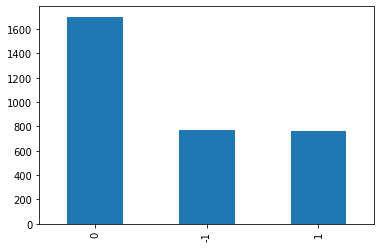

In [ ]:
#train['original_text']
train['sentiment_class'].value_counts().plot.bar()

In [ ]:
train.count()

original_text      3235
retweet_count      3235
sentiment_class    3235
dtype: int64

In [ ]:
val.count()

original_text      651
retweet_count      651
sentiment_class    651
dtype: int64

In [ ]:
#train['sentiment_class'].astype('string')
train['sentiment_class'] = train['sentiment_class'].replace(to_replace =[0,-1,1],  
                            value =["neutral",'negative','positive']) 

#val['sentiment_class'] = val['sentiment_class'].replace(to_replace =[0,-1,1],  
#                            value =["neutral",'negative','positive']) 

In [ ]:
emotions = ["neutral",'negative','positive']
for em in emotions:
  print(len(tokenizer.encode(em)))

1
1
1


In [ ]:
tokenizer = T5Tokenizer.from_pretrained('t5-base')

In [ ]:
train = train.reset_index(drop=True)
#val = val.reset_index(drop=True)

In [ ]:
train.loc[103, "original_text"], train.loc[103, "sentiment_class"] 

('to my mom my sister my sisters in law happy happy mothers day with u all wish u gudhealth all be safe love u gudluck',
 'neutral')

In [ ]:
class EmotionDataset(Dataset):
  def __init__(self, tokenizer,type_path,max_len=64):
    #self.path = os.path.join(data_dir, type_path + '.txt')
    self.data_column = "original_text"
    self.class_column = "sentiment_class"
    self.data = type_path[['original_text','sentiment_class']]
    self.max_len = max_len
    self.tokenizer = tokenizer
    self.inputs = []
    self.targets = []

    self._build()
  
  def __len__(self):
    return len(self.inputs)
  
  def __getitem__(self, index):
    source_ids = self.inputs[index]["input_ids"].squeeze()
    target_ids = self.targets[index]["input_ids"].squeeze()

    src_mask    = self.inputs[index]["attention_mask"].squeeze()  # might need to squeeze
    target_mask = self.targets[index]["attention_mask"].squeeze()  # might need to squeeze

    return {"source_ids": source_ids, "source_mask": src_mask, "target_ids": target_ids, "target_mask": target_mask}
  
  def _build(self):
    for idx in range(len(self.data)):
      input_, target = self.data.loc[idx, self.data_column], self.data.loc[idx, self.class_column]      
      
      input_ = input_ + ' </s>'
      target = target + " </s>"

       # tokenize inputs
      tokenized_inputs = self.tokenizer.batch_encode_plus(
          [input_], max_length=self.max_len, pad_to_max_length=True, return_tensors="pt"
      )
       # tokenize targets
      tokenized_targets = self.tokenizer.batch_encode_plus(
          [target], max_length=2, pad_to_max_length=True, return_tensors="pt"
      )

      self.inputs.append(tokenized_inputs)
      self.targets.append(tokenized_targets)

In [ ]:
dataset = EmotionDataset(tokenizer, val, 64)
len(dataset)

811

In [ ]:
data = dataset[44]
print(tokenizer.decode(data['source_ids']))
print(tokenizer.decode(data['target_ids']))

happy mothers day to all the super women out there! cafe is the spot
positive


In [ ]:
!mkdir -p t5_emotion

In [ ]:
args_dict.update({'data_dir': 'emotion_data', 'output_dir': 't5_emotion', 'num_train_epochs':2,'max_seq_length': 64})
args = argparse.Namespace(**args_dict)
print(args_dict)

{'data_dir': 'emotion_data', 'output_dir': 't5_emotion', 'model_name_or_path': 't5-base', 'tokenizer_name_or_path': 't5-base', 'max_seq_length': 64, 'learning_rate': 0.0003, 'weight_decay': 0.0, 'adam_epsilon': 1e-08, 'warmup_steps': 0, 'train_batch_size': 8, 'eval_batch_size': 8, 'num_train_epochs': 2, 'gradient_accumulation_steps': 16, 'n_gpu': 1, 'early_stop_callback': False, 'fp_16': False, 'opt_level': 'O1', 'max_grad_norm': 1.0, 'seed': 42}


In [ ]:
checkpoint_callback = pl.callbacks.ModelCheckpoint(
    filepath=args.output_dir, prefix="checkpoint", monitor="val_loss", mode="min", save_top_k=5
)

train_params = dict(
    accumulate_grad_batches=args.gradient_accumulation_steps,
    gpus=args.n_gpu,
    max_epochs=args.num_train_epochs,
    early_stop_callback=False,
    precision= 16 if args.fp_16 else 32,
    amp_level=args.opt_level,
    gradient_clip_val=args.max_grad_norm,
    checkpoint_callback=checkpoint_callback,
    callbacks=[LoggingCallback()],
)

/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Checkpoint directory t5_emotion exists and is not empty with save_top_k != 0.All files in this directory will be deleted when a checkpoint is saved!
  warnings.warn(*args, **kwargs)


In [ ]:
def get_dataset(tokenizer,type_path, args):
  return EmotionDataset(tokenizer=tokenizer, type_path=type_path,  max_len=args.max_seq_length)

In [ ]:
model = T5FineTuner(args)

In [ ]:
trainer = pl.Trainer(**train_params)

GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]


In [ ]:
trainer.fit(model)


    | Name                                                                  | Type                       | Params
-----------------------------------------------------------------------------------------------------------------
0   | model                                                                 | T5ForConditionalGeneration | 222 M 
1   | model.shared                                                          | Embedding                  | 24 M  
2   | model.encoder                                                         | T5Stack                    | 109 M 
3   | model.encoder.block                                                   | ModuleList                 | 84 M  
4   | model.encoder.block.0                                                 | T5Block                    | 7 M   
5   | model.encoder.block.0.layer                                           | ModuleList                 | 7 M   
6   | model.encoder.block.0.layer.0                                         | T5LayerSe

1

In [ ]:
import textwrap
from tqdm.auto import tqdm
from sklearn import metrics

In [ ]:
dataset = EmotionDataset(tokenizer, val, 64)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
it = iter(loader)

In [ ]:
batch = next(it)
batch["source_ids"].shape

torch.Size([32, 64])

In [ ]:
outs = model.model.generate(input_ids=batch['source_ids'].cuda(), 
                              attention_mask=batch['source_mask'].cuda(), 
                              max_length=2)

dec = [tokenizer.decode(ids) for ids in outs]

texts = [tokenizer.decode(ids) for ids in batch['source_ids']]
targets = [tokenizer.decode(ids) for ids in batch['target_ids']]

In [ ]:
for i in range(32):
    c = texts[i]
    lines = textwrap.wrap("text:\n%s\n" % c, width=100)
    print("\n".join(lines))
    print("\nActual sentiment: %s" % targets[i])
    print("predicted sentiment: %s" % dec[i])
    print("=====================================================================\n")

text: hows it going moms?

Actual sentiment: positive
predicted sentiment: neutral

text: another time to celebrate our women. our walking and working miracle the world will forever
need you. happy mothers day.

Actual sentiment: negative
predicted sentiment: neutral

text: happy mothers day! ellie blair shares some of the spiritual traditions of mothers day across
various cultures in the new post on the kindred spirit website hersday

Actual sentiment: neutral
predicted sentiment: neutral

text: happy mothers day ladies! and i do mean biological and trans women lesbians and foster
parents. you know any parent who identifies as female. because being a mother is much more than
being related by blood. just thought id clarify that in case anyone was confused.

Actual sentiment: neutral
predicted sentiment: neutral

text: happy mothers day to all those wonderful women  ⁇ nganniversary

Actual sentiment: negative
predicted sentiment: neutral

text: happy mothers day to all the mums out ther

In [ ]:
test['sentiment_class'] = 'negative'

In [ ]:
dataset = EmotionDataset(tokenizer, test, 64)
loader = DataLoader(dataset, batch_size=32, num_workers=4)
model.model.eval()
outputs = []
targets = []
for batch in tqdm(loader):
  outs = model.model.generate(input_ids=batch['source_ids'].cuda(), 
                              attention_mask=batch['source_mask'].cuda(), 
                              max_length=2)

  dec = [tokenizer.decode(ids) for ids in outs]
  target = [tokenizer.decode(ids) for ids in batch["target_ids"]]
  
  outputs.extend(dec)
  targets.extend(target)

In [ ]:
out_list = []
for i, out in enumerate(outputs):
  if out  == 'neutral':
    out_list.append(0)
  elif out == 'negative':
    out_list.append(-1)
  else:
    out_list.append(1)
  if out not in emotions:
    print(i, 'detected invalid prediction')

In [ ]:
output = np.array(out_list)

In [ ]:
output

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
output_fi = pd.DataFrame(test['id'].values,columns = ['id'])

In [ ]:
output_fi['sentiment_class'] = result

In [ ]:
output_fi['sentiment_class'].value_counts()

0    1350
1      22
2      15
Name: sentiment_class, dtype: int64

In [ ]:
output_fi['sentiment_class'] = output_fi['sentiment_class'].replace(to_replace =[0,1,2],  
                            value =[0,-1,1]) 

In [ ]:
output_fi.reset_index(drop=True,inplace = True)

In [ ]:
output_fi.head()

,id,sentiment_class
0,1.246628e+18,0
1,1.245898e+18,0
2,1.244717e+18,0
3,1.245730e+18,0
4,1.244636e+18,0


In [ ]:
output_fi.to_csv('test_fi1.csv',index=False)

In [ ]:
from google.colab import files
files.download('test_fi1.csv')

In [ ]:
os.listdir()

['glove.twitter.27B.25d.txt',
 'glove.twitter.27B.zip',
 'dataset',
 'fa62f5d69a9f11ea.zip',
 'logs',
 'best_model1.h5',
 'model_plot3.png',
 'best_model.h5',
 'training.ipynb',
 't5_emotion',
 'lightning_logs',
 'test_fi.csv']

In [ ]:
seq_lengths = np.array([len(s.split()) for s in train['original_text']])
print([(p, np.percentile(seq_lengths, p)) for p
   in [75, 80, 90, 95, 99, 100]])

[(75, 39.0), (80, 41.0), (90, 46.0), (95, 50.0), (99, 56.0), (100, 61.0)]


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(train['original_text'])
vocab_size = len(tokenizer.word_counts) +1
print("vocabulary size: {:d}".format(vocab_size))
word2idx = tokenizer.word_index
idx2word = {v:k for (k, v) in word2idx.items()}

vocabulary size: 7607


**Two Variable Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train[['original_text','retweet_count']], train['sentiment_class'], test_size=0.20, random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=3)
y_test = to_categorical(y_test,num_classes=3)

In [ ]:
max_seqlen = 61
# create dataset
X1_train = tokenizer.texts_to_sequences(X_train['original_text'])
X1_test = tokenizer.texts_to_sequences(X_test['original_text'])
X1_train = tf.keras.preprocessing.sequence.pad_sequences(X1_train,padding='post', maxlen=max_seqlen)
X1_test = tf.keras.preprocessing.sequence.pad_sequences(X1_test,padding='post', maxlen=max_seqlen)

In [ ]:
X2_train = X_train['retweet_count'].values
X2_test = X_test['retweet_count'].values

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.twitter.27B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = zeros((vocab_size, 200))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate

import pandas as pd
import numpy as np
import re

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           [(None, 61)]         0                                            
__________________________________________________________________________________________________
embedding_16 (Embedding)        (None, 61, 200)      1494800     input_34[0][0]                   
__________________________________________________________________________________________________
input_35 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
bidirectional_12 (Bidirectional (None, 61, 256)      336896      embedding_16[0][0]               
___________________________________________________________________________________________

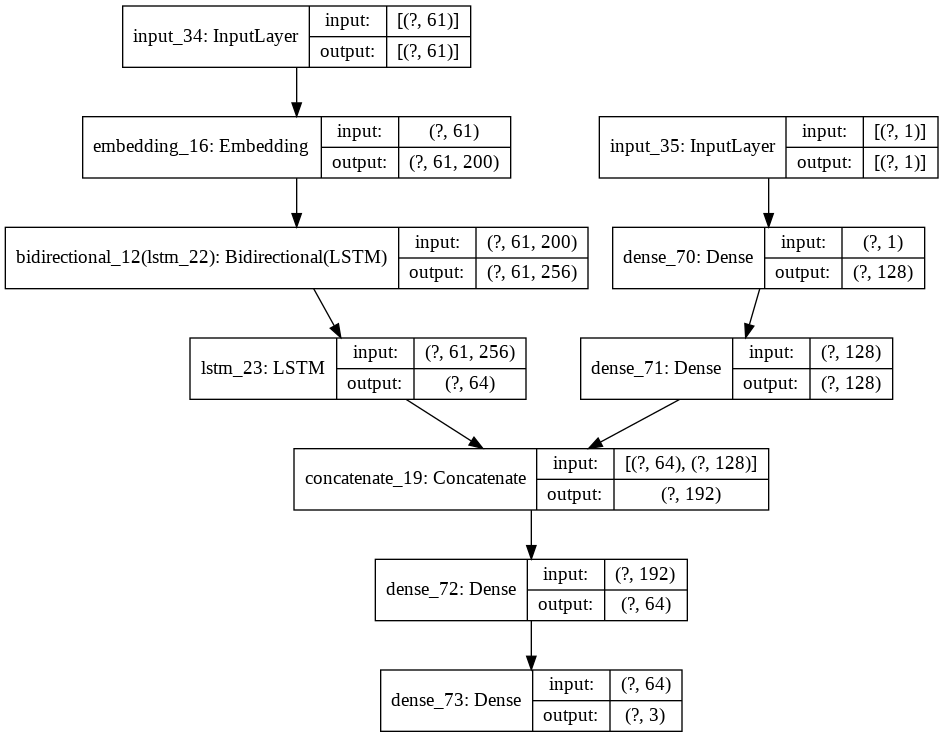

In [ ]:
input_1 = tf.keras.layers.Input(shape=(max_seqlen,))
embedding_layer = tf.keras.layers.Embedding(vocab_size, 200)(input_1)#, weights=[embedding_matrix], trainable=False
bilstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True))(embedding_layer)
lstm = tf.keras.layers.LSTM(units=64, return_sequences=False)(bilstm)

input_2 = tf.keras.layers.Input(shape=(1,))
dense_layer_1 = Dense(128, activation='relu')(input_2)
dense_layer_2 = Dense(128, activation='relu')(dense_layer_1)

concat_layer = Concatenate()([lstm, dense_layer_2])
dense_layer_3 = Dense(64, activation='relu')(concat_layer)
output = Dense(3, activation='softmax')(dense_layer_3)
model= Model(inputs=[input_1, input_2], outputs=output)

adam=Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
data_dir = "data"
logs_dir = os.path.join("./logs")
best_model_file = "best_model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(best_model_file,
   save_weights_only=True,
   save_best_only=True)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)
history = model.fit(x=[X1_train, X2_train], y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.15,callbacks=[checkpoint, tensorboard])

Epoch 1/10
35/35 [==============================] - 23s 668ms/step - loss: 0.9864 - acc: 0.5434 - val_loss: 1.0198 - val_acc: 0.5578
Epoch 2/10
35/35 [==============================] - 23s 663ms/step - loss: 0.9376 - acc: 0.5807 - val_loss: 1.1514 - val_acc: 0.4422
Epoch 3/10
35/35 [==============================] - 16s 465ms/step - loss: 0.8534 - acc: 0.6266 - val_loss: 1.2204 - val_acc: 0.4576
Epoch 4/10
35/35 [==============================] - 16s 462ms/step - loss: 0.7330 - acc: 0.6744 - val_loss: 1.4949 - val_acc: 0.3573
Epoch 5/10
35/35 [==============================] - 16s 460ms/step - loss: 0.6325 - acc: 0.7144 - val_loss: 1.3940 - val_acc: 0.4422
Epoch 6/10
35/35 [==============================] - 16s 462ms/step - loss: 0.5597 - acc: 0.7581 - val_loss: 1.5460 - val_acc: 0.4139
Epoch 7/10
35/35 [==============================] - 16s 467ms/step - loss: 0.4877 - acc: 0.7985 - val_loss: 1.7733 - val_acc: 0.3805
Epoch 8/10
35/35 [==============================] - 16s 467ms/step - 

In [ ]:
model= Model(inputs=[input_1, input_2], outputs=output)
model.load_weights(best_model_file)
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
print(model.summary())




Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           [(None, 61)]         0                                            
__________________________________________________________________________________________________
embedding_16 (Embedding)        (None, 61, 200)      1494800     input_34[0][0]                   
__________________________________________________________________________________________________
input_35 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
bidirectional_12 (Bidirectional (None, 61, 256)      336896      embedding_16[0][0]               
___________________________________________________________________________________________

In [ ]:
score = model.evaluate(x=[X1_test,X2_test], y=y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

21/21 [==============================] - 2s 73ms/step - loss: 1.0886 - acc: 0.4930
Test Score: 1.0886131525039673
Test Accuracy: 0.49304482340812683


In [ ]:
labels, predictions = [], []
idx2word[0] = "PAD"

In [ ]:
df1[df1.columns[0]].value_counts()

0    645
1      2
Name: 0, dtype: int64

In [ ]:
import pandas as pd
x=[X1_test, X2_test] 
y = np.argmax(y_test,axis=-1)
y[y==2]=[-1]
pred = model.predict(x)
pred = np.round(pred)
pred = np.argmax(pred,axis=-1)
df1 = pd.DataFrame(pred)
df2 = pd.DataFrame(y)
df = pd.concat([df1,df2],axis=1)
df

,0,0
0,0,-1
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
642,0,0
643,0,-1
644,0,-1
645,0,0


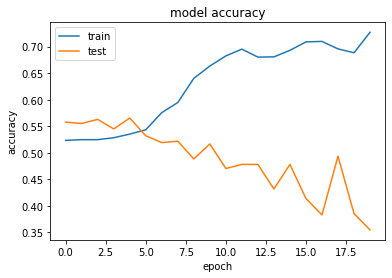

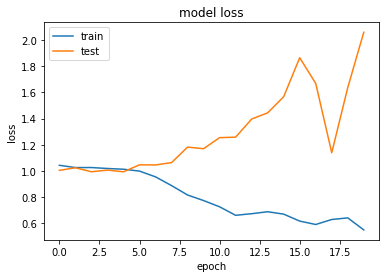

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

**Keras high level api Model-2**

In [ ]:
max_seqlen = 61
# create dataset
#target = train.pop('sentiment_class')
sentences_as_ints = tokenizer.texts_to_sequences(train['original_text'])
sentences_as_ints = tf.keras.preprocessing.sequence.pad_sequences(sentences_as_ints,padding='post', maxlen=max_seqlen)
#labels_as_ints = np.array(labels)
dataset = tf.data.Dataset.from_tensor_slices(({'input1':sentences_as_ints,'input2':retweet},target))
#inp2 = tf.data.Dataset.from_tensor_slices(train['retweet_count'].values)
#tar = tf.data.Dataset.from_tensor_slices(target)

In [ ]:
dataset = dataset.shuffle(10000)
test_size = len(train['original_text']) // 7
print('test_size:',test_size)
val_size = (len(train['original_text']) - test_size) // 10
print('val_size:',val_size)
test_dataset = dataset.take(test_size)
val_dataset = dataset.skip(test_size).take(val_size)
train_dataset = dataset.skip(test_size + val_size)
batch_size = 64
train_dataset = train_dataset.batch(batch_size,drop_remainder=True)
val_dataset = val_dataset.batch(batch_size,drop_remainder=True)
test_dataset = test_dataset.batch(batch_size,drop_remainder=True)

test_size: 462
val_size: 277


In [ ]:
class SentimentAnalysisModel(tf.keras.Model):
   def __init__(self, vocab_size, max_seqlen, **kwargs):
       super(SentimentAnalysisModel, self).__init__(**kwargs)
       self.embedding = tf.keras.layers.Embedding(
           vocab_size, max_seqlen)
       self.bilstm = tf.keras.layers.Bidirectional(
           tf.keras.layers.LSTM(max_seqlen)
       )
       self.dense = tf.keras.layers.Dense(64, activation="relu")
       self.out = tf.keras.layers.Dense(1, activation="sigmoid")
   def call(self, x):
       x = self.embedding(x)
       x = self.bilstm(x)
       x = self.dense(x)
       x = self.out(x)
       return x
model = SentimentAnalysisModel(vocab_size+1, max_seqlen)
model.build(input_shape=(batch_size, max_seqlen))
model.summary()
# compile
model.compile(
   loss="binary_crossentropy",
   optimizer="adam",
   metrics=["accuracy"]
)
# train
data_dir = "data"
logs_dir = os.path.join("./logs")
best_model_file = "best_model.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(best_model_file,
   save_weights_only=True,
   save_best_only=True)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)

num_epochs = 20
history = model.fit(train_dataset, epochs=num_epochs,
   validation_data=val_dataset,
   callbacks=[checkpoint, tensorboard])

In [ ]:
best_model = SentimentAnalysisModel(vocab_size+1, max_seqlen)
best_model.build(input_shape=(batch_size, max_seqlen))
best_model.load_weights(best_model_file)
best_model.compile(
   loss="binary_crossentropy",
   optimizer="adam",
   metrics=["accuracy"]
)

In [ ]:
test_loss, test_acc = best_model.evaluate(test_dataset)
print("test loss: {:.3f}, test accuracy: {:.3f}".format(test_loss, test_acc))

8/8 [==============================] - 0s 17ms/step - loss: -714.2446 - accuracy: 0.6385
test loss: -714.245, test accuracy: 0.639


**Bert examp**

In [ ]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


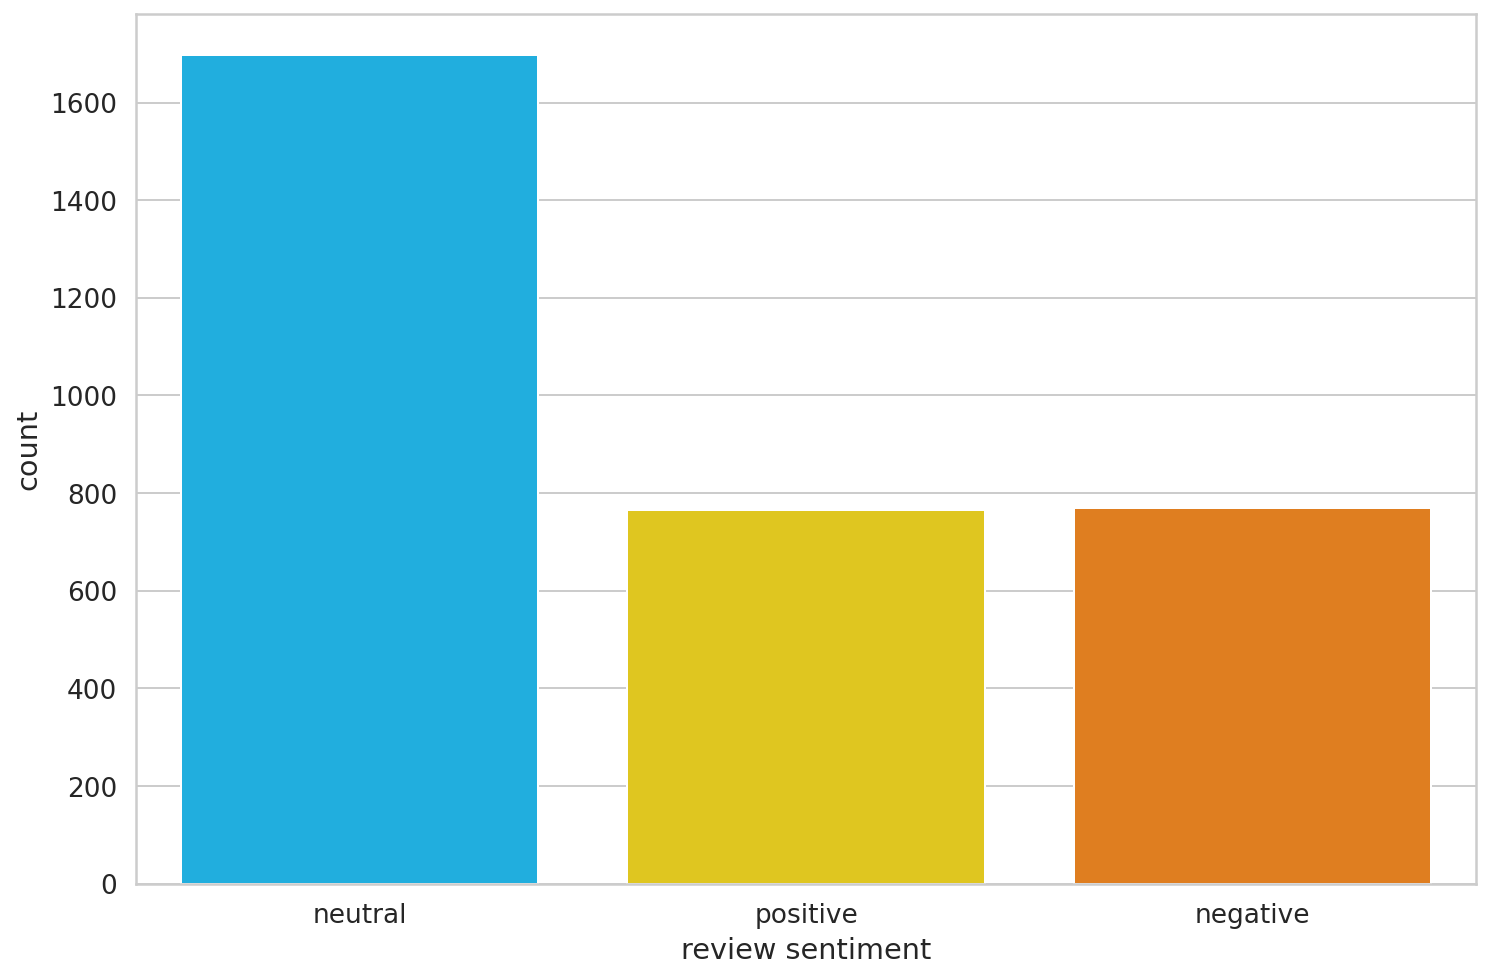

In [ ]:
def to_sentiment(rating):
  rating = int(rating)
  if rating == 0:
    return 0
  elif rating == 1:
    return 1
  else:
    return 2
train['sentiment_class'] = train.sentiment_class.apply(to_sentiment)
class_names = [ 'neutral','positive', 'negative']
ax = sns.countplot(train.sentiment_class)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
sample_txt = 'happy mothers day to everyone tuning in. this is the 4th round game between me and castigersj live coverage on twitter maybe one day skysportsrl or on the ourleague app'

tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: happy mothers day to everyone tuning in. this is the 4th round game between me and castigersj live coverage on twitter maybe one day skysportsrl or on the ourleague app
   Tokens: ['happy', 'mothers', 'day', 'to', 'everyone', 'tuning', 'in', '.', 'this', 'is', 'the', '4th', 'round', 'game', 'between', 'me', 'and', 'cast', '##iger', '##s', '##j', 'live', 'coverage', 'on', 'twitter', 'maybe', 'one', 'day', 'sky', '##sport', '##sr', '##l', 'or', 'on', 'the', 'our', '##lea', '##gue', 'app']
Token IDs: [3407, 10756, 2154, 2000, 3071, 17372, 1999, 1012, 2023, 2003, 1996, 4343, 2461, 2208, 2090, 2033, 1998, 3459, 17071, 2015, 3501, 2444, 6325, 2006, 10474, 2672, 2028, 2154, 3712, 20205, 21338, 2140, 2030, 2006, 1996, 2256, 19738, 9077, 10439]


In [ ]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [ ]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

In [ ]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [ ]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

In [ ]:
#example
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)
encoding.keys()
#dict_keys(['input_ids', 'attention_mask'])
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

32
32


['[CLS]',
 'happy',
 'mothers',
 'day',
 'to',
 'everyone',
 'tuning',
 'in',
 '.',
 'this',
 'is',
 'the',
 '4th',
 'round',
 'game',
 'between',
 'me',
 'and',
 'cast',
 '##iger',
 '##s',
 '##j',
 'live',
 'coverage',
 'on',
 'twitter',
 'maybe',
 'one',
 'day',
 'sky',
 '##sport',
 '[SEP]']

In [ ]:
MAX_LEN = 64

In [ ]:
train.columns

Index(['original_text', 'retweet_count', 'sentiment_class'], dtype='object')

In [ ]:
class GPReviewDataset(Dataset):
  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  def __len__(self):
    return len(self.reviews)
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
df_train, df_test = train_test_split(
  train,
  test_size=0.1,
  random_state=RANDOM_SEED
)
df_val, df_test = train_test_split(
  df_test,
  test_size=0.5,
  random_state=RANDOM_SEED
)

In [ ]:
df_train.shape, df_val.shape, df_test.shape

((2907, 3), (162, 3), (162, 3))

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=df.original_text.to_numpy(),
    targets=df.sentiment_class.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )
BATCH_SIZE = 32
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)


In [ ]:
data = next(iter(train_data_loader))
data.keys()
#dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32])


In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'],
  attention_mask=encoding['attention_mask']
)

In [ ]:
last_hidden_state.shape

torch.Size([1, 32, 768])

In [ ]:
bert_model.config.hidden_size

768

In [ ]:
pooled_output.shape

torch.Size([1, 768])

In [ ]:
class SentimentClassifier(nn.Module):
  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    #self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    #output = self.drop(pooled_output)
    return self.out(pooled_output)

In [ ]:
model = SentimentClassifier(len(class_names))
model = model.to(device)

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)
print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([32, 64])
torch.Size([32, 64])


In [ ]:
EPOCHS = 5
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)


How do we come up with all hyperparameters? The BERT authors have some recommendations for fine-tuning:

Batch size: 16, 32
Learning rate (Adam): 5e-5, 3e-5, 2e-5
Number of epochs: 2, 3, 4
We’re going to ignore the number of epochs recommendation but stick with the rest. Note that increasing the batch size reduces the training time significantly, but gives you lower accuracy.

In [ ]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  model = model.train()
  losses = []
  correct_predictions = 0
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, targets)
      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time
history = defaultdict(list)
best_accuracy = 0
for epoch in range(EPOCHS):
  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')
  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )
  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/5
----------
Train loss 1.0384252051730731 accuracy 0.5184038527691779
Val   loss 1.009930948416392 accuracy 0.654320987654321

Epoch 2/5
----------
Train loss 1.0322169700821677 accuracy 0.5180598555211559
Val   loss 1.0215856432914734 accuracy 0.654320987654321

Epoch 3/5
----------
Train loss 1.0263254249488913 accuracy 0.5180598555211559
Val   loss 1.0134172141551971 accuracy 0.654320987654321

Epoch 4/5
----------
Train loss 0.9961694112190833 accuracy 0.523219814241486
Val   loss 0.9979206124941508 accuracy 0.5740740740740741

Epoch 5/5
----------
Train loss 0.8855500640449944 accuracy 0.6157550739594083
Val   loss 1.0707976321379344 accuracy 0.5493827160493827

CPU times: user 1min 42s, sys: 1min 3s, total: 2min 46s
Wall time: 3min 2s


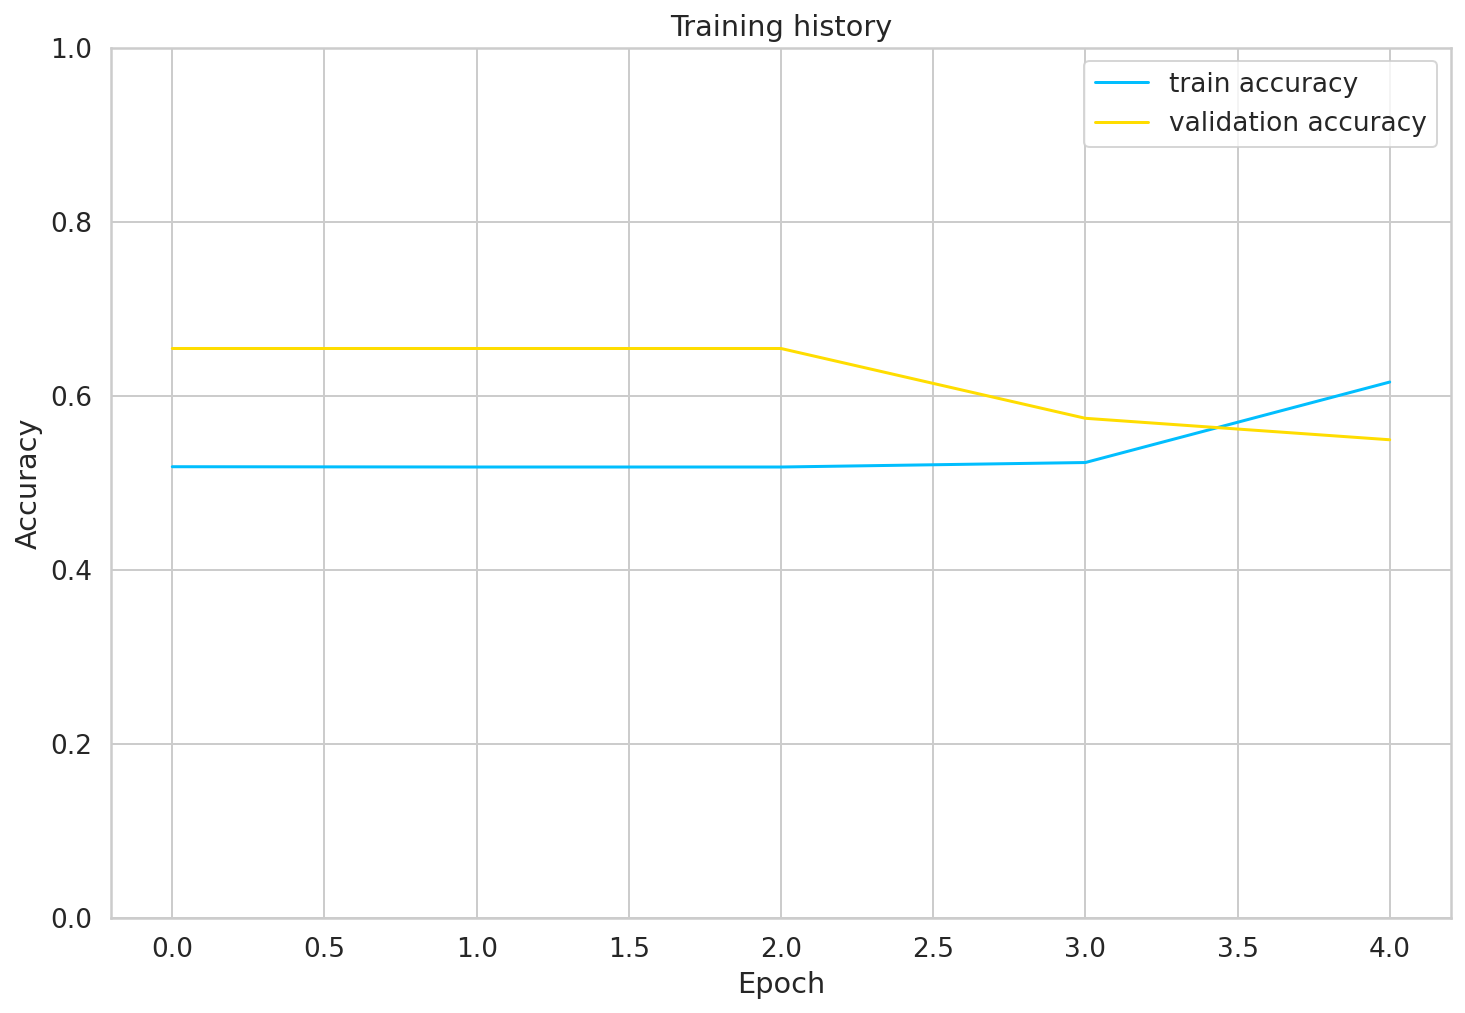

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)
test_acc.item()

0.43209876543209874

In [ ]:
def get_predictions(model, data_loader):
  model = model.eval()
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in data_loader:
      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(targets)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     neutral       0.52      0.74      0.61        85
    positive       0.19      0.12      0.15        42
    negative       0.13      0.06      0.08        35

    accuracy                           0.43       162
   macro avg       0.28      0.31      0.28       162
weighted avg       0.35      0.43      0.38       162



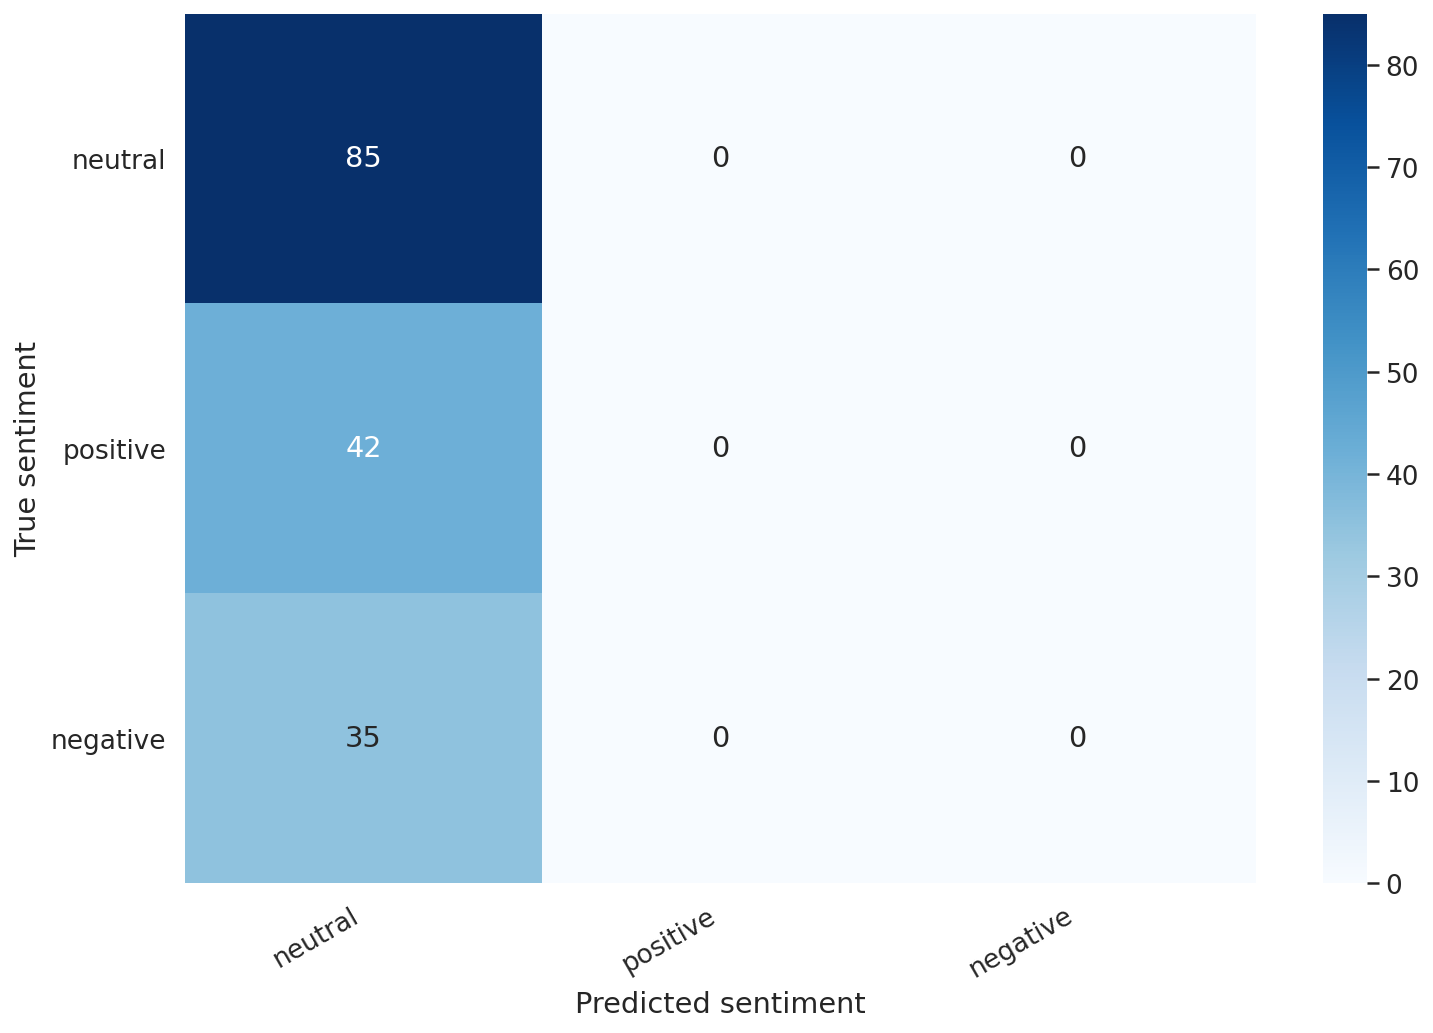

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
idx = 2
review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': class_names,
  'values': y_pred_probs[idx]
})
print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {class_names[true_sentiment]}')

happy mothers day to all you amazing mums out there! sorry we cannot
be open to spoil you hopefully your families are doing that for us!
stay safe all!

True sentiment: neutral


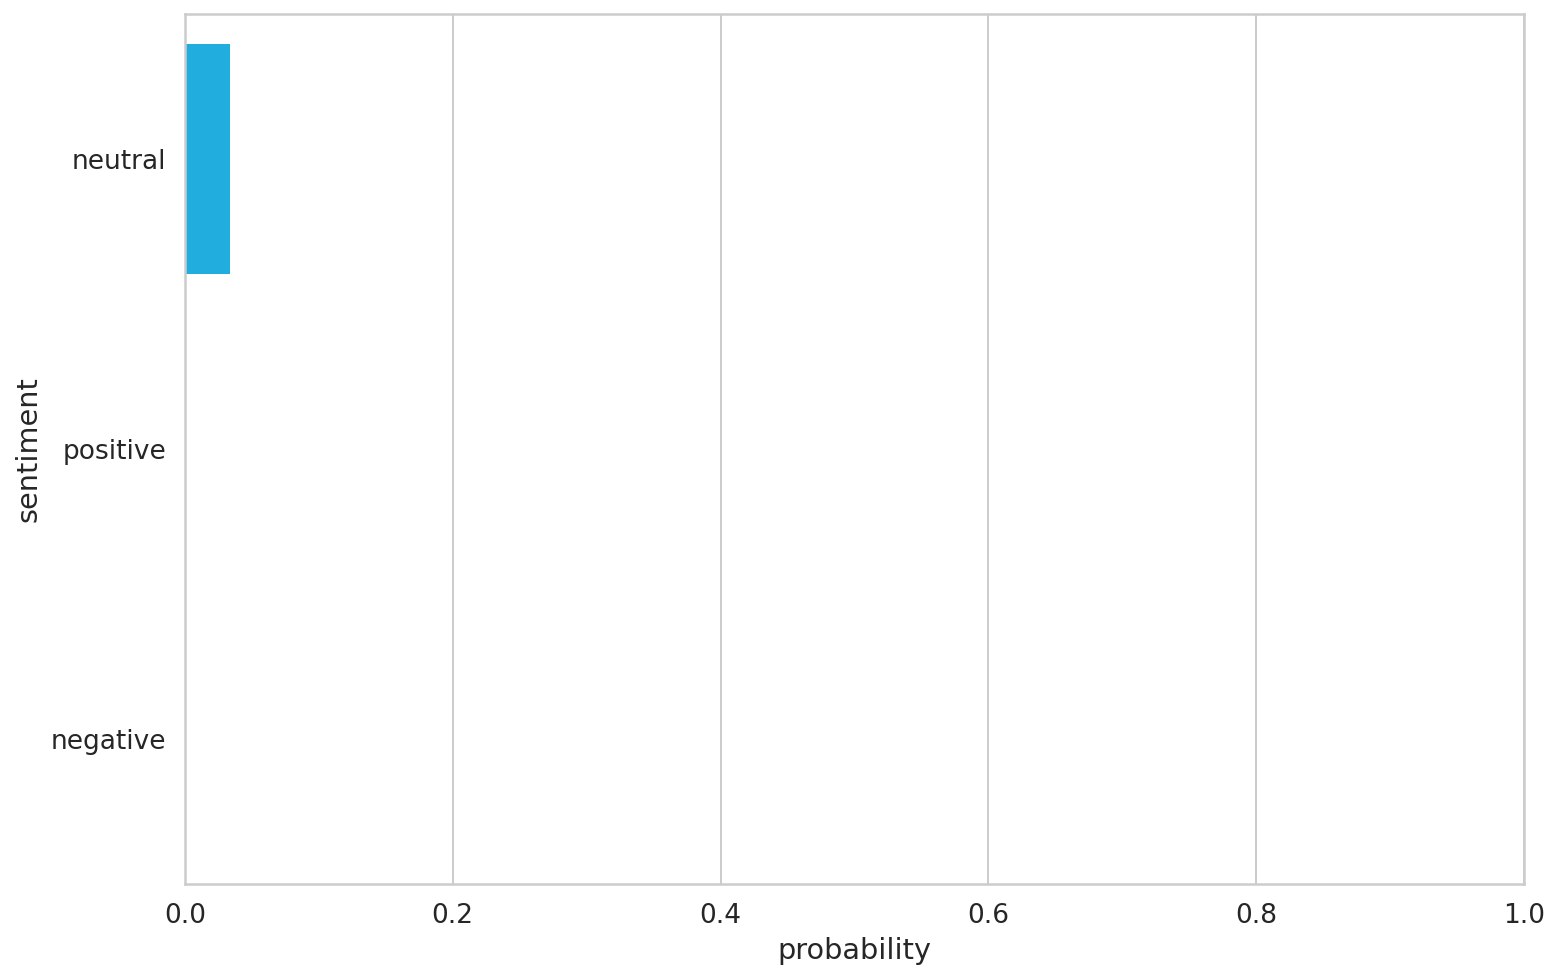

In [ ]:
sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [ ]:
review_text  = 'happy mothers day to my strong adorable and hilarious muma antons muma in heaven antons sisters my amazing friends with beautiful babies my aunties my godmother my nonna my stepmum and my grannys. love you all forever'

In [ ]:
PREDCTIONs = []
for review_text in test.original_text:
  encoded_review = tokenizer.encode_plus(
    review_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
  )
  input_ids = encoded_review['input_ids'].to(device)
  attention_mask = encoded_review['attention_mask'].to(device)
  output = model(input_ids, attention_mask)
  _, prediction = torch.max(output, dim=1)
  print(f'Review text: {review_text}')
  print(f'Sentiment  : {class_names[prediction]}')
  if prediction == 2:
    PREDCTIONs.append(-1)
  else:
    PREDCTIONs.append(prediction)

Review text: 3 yeah i once cooked potatoes when i was 3 years old and by that i mean i threw a bag of spuds into the toilet happy mothers day i made breakfast! 66 that time i thought i was cool by drawing the naked lady dachshund on the overhead projector in psychology class 8
Sentiment  : neutral
Review text: happy mothers day to all the mums stepmums grandmothers and dads that cover both parental roles 
Sentiment  : neutral
Review text: i love the people from the uk however when i awoke and saw trending it woke this american up immediately happy mothers day to all of you mums across the way! god bless you the love you share and the sacrifices you make!
Sentiment  : neutral
Review text: happy 81st birthday happy mothers day to my mum who we cant see today to keep her safe shame so many others are ignoring the advice 19 
Sentiment  : neutral
Review text: happy mothers day to all those wonderful mothers out there in the world will live in at present you can always rely on your mother to

In [ ]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)
output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)
print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')

Review text: happy mothers day to my strong adorable and hilarious muma antons muma in heaven antons sisters my amazing friends with beautiful babies my aunties my godmother my nonna my stepmum and my grannys. love you all forever
Sentiment  : neutral
